# Astro 9 Final Project: Bake Sharing Demand Analysis

## Project Description
**Project name**: Bake Sharing Demand Analysis

**Author**: Wang Siji

**School**: Shanghai Jiao Tong University

**Student ID**: 3035306496

**E_mail address**: 807403713@sjtu.edu.cn

**Data sources**: https://www.kaggle.com/c/bike-sharing-demand/data

**Data description**: The data set is shared bicycle rental data in Washington, USA. It includes training set and test set. The training set contains 10886 samples and 12 fields. Through bicycle rental data in training set, the demand of shared bicycle rental in Washington, USA is forecasted. 

**Puepose**: this project is bake sharing demand analysis, we analyze the impact of various factors, such as month, weaher, season. and relevance between different factors, finally, we apply some mechine learning and deep learning algorithm to the dataset, and predict the future demand of bake sharing.


## Dependency Libraries

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

## Files of Project

1) README.md - introduction of project

2) train.csv - train set

3) bike-sharing-demand.ipynb - juputer notebook

In [1]:
ls

README.md                  train.csv*
bike-sharing-demand.ipynb


## Data

### Data Fields

1) datetime - hourly date + timestamp  

2) season -  1 = spring, 2 = summer, 3 = fall, 4 = winter

3) holiday - whether the day is considered a holiday

4) workingday - whether the day is neither a weekend nor holiday

5) weather - 

*1: Clear, Few clouds, Partly cloudy, Partly cloudy 

*2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

*3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

*4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

6) temp - temperature in Celsius

7) atemp - "feels like" temperature in Celsius

8) humidity - relative humidity

9) windspeed - wind speed

10) casual - number of non-registered user rentals initiated

11) registered - number of registered user rentals initiated
12) count - number of total rentals

In [4]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_rows',4)

#### data frame
train set has 12 columns and 10886 rows and test set have 12 colunmns and 6494 rows

In [5]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
...,...,...,...,...,...,...,...,...,...,...,...,...
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
data = pd.read_csv('sampleSubmission.csv')

#### change to numpy array

In [7]:
data_np_array =  np.array(df)

In [8]:
data_np_array[:,11]

array([16, 40, 32, ..., 168, 129, 88], dtype=object)

#### 12 columns for training set

In [9]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

## Analysis

### Seasons

In [10]:
season_data = np.array(df['season'])
season_count_data = np.array(df['count']) 
season_data.shape

(10886,)

In [11]:
season_count = np.zeros(4)
for i in range(10086):
    season_count[season_data[i]-1] += season_count_data[i]
season_count

array([312498., 588282., 640662., 364139.])

In [12]:
season = np.array(['Spring', 'Summer', 'autumn', 'winter'])
season_number = np.array([1,2,3,4])

#### plot the result

Text(0.5,1,'box')

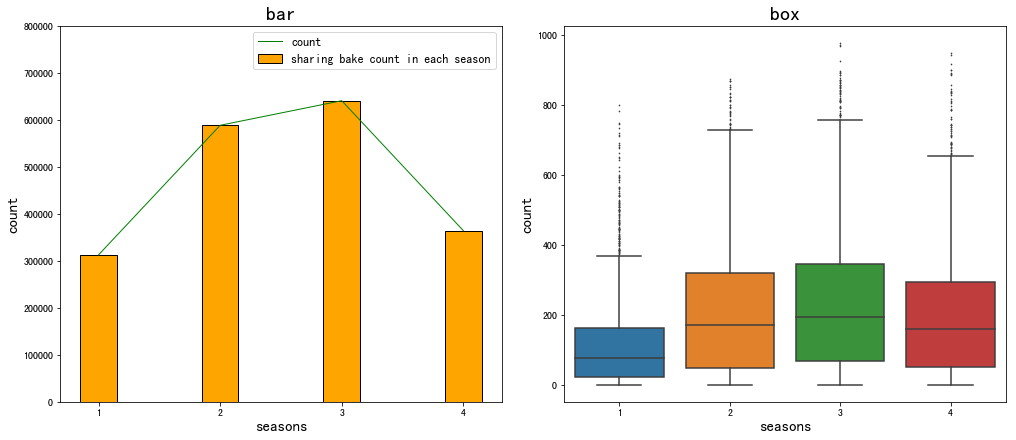

In [13]:
cols = 2
rows = 1
figsize = (14, 6)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].bar(season_number,height = season_count,width = 0.3,color = 'orange', label = 'sharing bake count in each season',edgecolor = 'black')
axs[0].plot(season_number,season_count,c = 'green',label = 'count',linewidth = 1)
axs[0].legend(loc = 1,fontsize =12)
axs[0].set_ylim(0,800000)
axs[0].set_xlabel('seasons',fontsize = 15)
axs[0].set_xticks([1,2,3,4])
axs[0].set_ylabel('count',fontsize = 15)
sns.boxplot(x='season', y='count', data=df, fliersize = 0.8)
axs[0].legend(loc = 1,fontsize =12)
axs[1].set_xlabel('seasons',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[0].set_title('bar',fontsize = 20)
axs[1].set_title('box',fontsize = 20)

#### Analysis
we can see from above, the demand of sharing bake change a lot from seasons, in summer and autumn, the demand is larger than in spring and winter, and the demand is twice of which in spring and winter.

### Convert the format and extract the hours, weeks, months add 4 items to the dataframe
we add 4 items, week, month, year_month, date

In [14]:
df = pd.read_csv('train.csv')

#Convert the format and extract the hours, weeks, months
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df.datetime.dt.hour
df['week'] = df.datetime.dt.dayofweek
df['month'] = df.datetime.dt.month
df['year_month'] = df.datetime.dt.strftime('%Y-%m')
df['date'] = df.datetime.dt.date
#delete datetime
df.drop('datetime', axis = 1, inplace = True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,5,1,2011-01,2011-01-01
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1,2011-01,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22,2,12,2012-12,2012-12-19
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23,2,12,2012-12,2012-12-19


### Month

#### 12 month demand (2011-2012)

In [15]:
month_data = np.array(df['month'])
month_count_data = np.array(df['count'])
month_data.shape

(10886,)

In [16]:
month_count = np.zeros(12)
for i in range(10886):
    month_count[month_data[i]-1] += month_count_data[i]
month_count

array([ 79884.,  99113., 133501., 167402., 200147., 220733., 214617.,
       213516., 212529., 207434., 176440., 160160.])

In [17]:
#set x-ticks
month_number = np.linspace(1,12,12).astype(int)
month_number

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

#### apply linear regression
we apply linear regression to the data from Jaunary to June and from June to December see whether the demand vary linearly

In [18]:
k_1_6, b_1_6 = np.polyfit(month_number[0:6],month_count[0:6],deg=1)
linear_regression_month_1_6 = k_1_6 * month_number[0:6] + b_1_6

k_7_12, b_7_12 = np.polyfit(month_number[6:12],month_count[6:12],deg=1)
linear_regression_month_7_12 = k_7_12 * month_number[6:12] + b_7_12

#### plot the result

Text(0.5,1,'box')

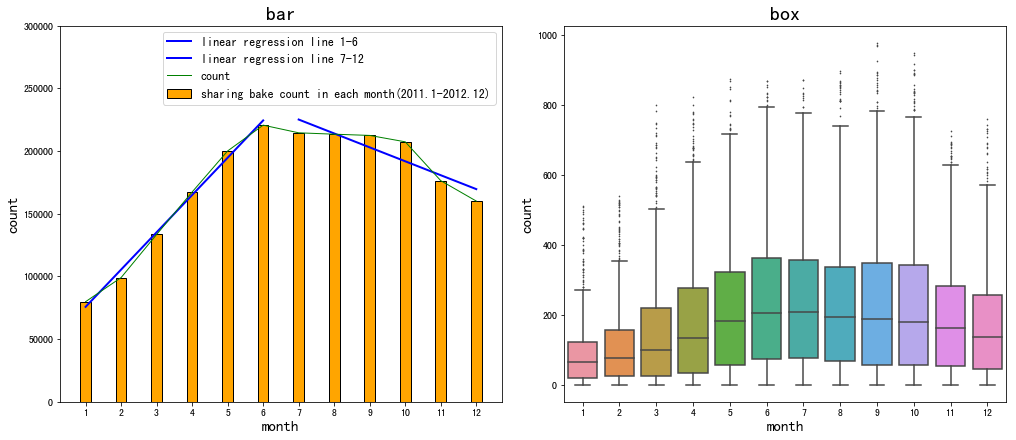

In [19]:
cols = 2
rows = 1
figsize = (14, 6)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].bar(month_number,height = month_count,width = 0.3,color = 'orange', label = 'sharing bake count in each month(2011.1-2012.12)',edgecolor = 'black')
axs[0].plot(month_number[0:6], linear_regression_month_1_6,c = 'blue',label = 'linear regression line 1-6', linewidth = 2)
axs[0].plot(month_number[6:12], linear_regression_month_7_12,c = 'blue',label = 'linear regression line 7-12', linewidth = 2)
axs[0].plot(month_number,month_count,c = 'green',label = 'count',linewidth = 1)
axs[0].legend(loc = 1,fontsize =12)
axs[0].set_ylim(0,300000)
axs[0].set_xlabel('month',fontsize = 15)
axs[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs[0].set_ylabel('count',fontsize = 15)
sns.boxplot(x='month', y='count', data=df,fliersize = 0.8)
axs[0].legend(loc = 1,fontsize =12)
axs[1].set_xlabel('month',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[0].set_title('bar',fontsize = 20)
axs[1].set_title('box',fontsize = 20)

#### Analysis
we can see from above, the demand of sharing bake change a lot from momths(12 months), from Jaunary to June, the demand keeps rising linearly from Jaunary to June and the linearity is very good. From July to December, the demand keeps decreasing linearly.

the demand is very large from May to October, and is extremely low in January and February.

### Week

In [20]:
week_data = np.array(df['week'])
week_count_data = np.array(df['count'])
week_data.shape

(10886,)

In [21]:
group_by_week = df.groupby('week').mean()
group_by_week

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
week,,,,,,,,,,,,,
0,2.560284,0.154094,0.845906,1.398453,20.620542,24.178507,62.508059,12.921691,29.843972,160.546744,190.390716,11.549968,6.651193
1,2.511371,0.000000,1.000000,1.510721,20.732307,24.252898,63.662768,13.338829,22.979207,166.744639,189.723847,11.596491,6.481481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2.500000,0.000000,0.000000,1.393939,19.668611,23.121266,61.253157,12.670136,63.625000,133.040404,196.665404,11.500000,6.560606
6,2.504750,0.000000,0.000000,1.379354,20.041963,23.569766,63.151995,12.499344,57.051298,123.788474,180.839772,11.524383,6.512983


In [22]:
week_count = np.zeros(7)
for i in range(10886):
    week_count[week_data[i]] += week_count_data[i]
week_count

array([295296., 291985., 292226., 306401., 302504., 311518., 285546.])

In [23]:
#set x-ticks
week_number = np.linspace(0,6,7).astype(int)
week_number

array([0, 1, 2, 3, 4, 5, 6])

#### plot the results

Text(0.5,1,'box')

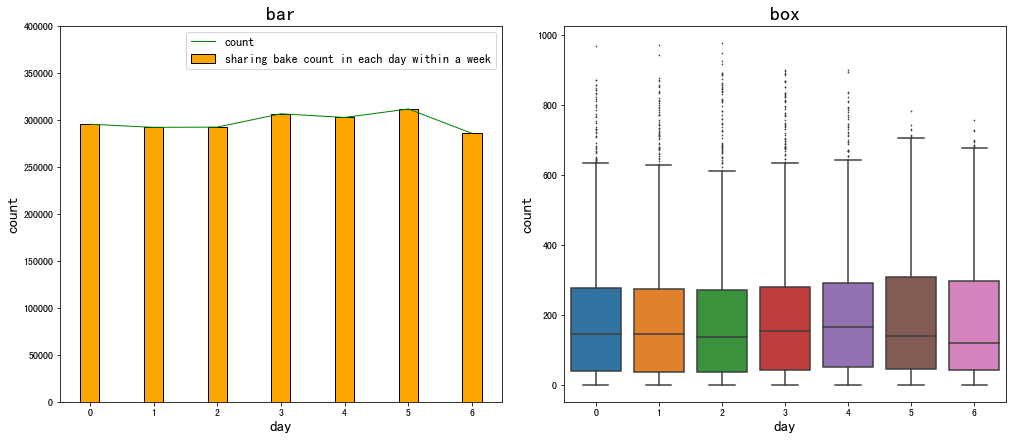

In [24]:
cols = 2
rows = 1
figsize = (14, 6)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].bar(week_number,height = week_count,width = 0.3,color = 'orange', label = 'sharing bake count in each day within a week',edgecolor = 'black')
#axs[0].plot(hour_number[17:24], linear_regression_hour_17_24,c = 'red',label = 'linear regression line 17_23', linewidth = 2)
#axs[0].plot(hour_number[5:9], linear_regression_hour_5_9,c = 'red',label = 'linear regression line 5_8', linewidth = 2)
axs[0].plot(week_number,week_count,c = 'green',label = 'count',linewidth = 1)
axs[0].legend(loc = 1,fontsize =12)
axs[0].set_ylim(0,400000)
axs[0].set_xlabel('day',fontsize = 15)
axs[0].set_xticks([0,1,2,3,4,5,6])
axs[0].set_ylabel('count',fontsize = 15)
sns.boxplot(x='week', y='count', data=df,fliersize = 0.8)
axs[0].legend(loc = 1,fontsize =12)
axs[1].set_xlabel('day',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[0].set_title('bar',fontsize = 20)
axs[1].set_title('box',fontsize = 20)

#### Analysis
we can see from above, the demand of sharing bake change a alittke from days within a week. From Monday to Sunday, the demand change a little.

### Hour

In [25]:
group_by_hour = df.groupby('hour').mean()
group_by_hour

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,week,month
hour,,,,,,,,,,,,,
0,2.503297,0.028571,0.681319,1.393407,19.013187,22.462582,68.079121,10.701564,10.312088,44.826374,55.138462,3.013187,6.512088
1,2.502203,0.028634,0.680617,1.431718,18.639648,22.011476,69.581498,10.418839,6.513216,27.345815,33.859031,3.017621,6.506608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2.500000,0.028509,0.682018,1.375000,19.766316,23.232379,64.567982,11.844718,22.603070,110.973684,133.576754,3.008772,6.500000
23,2.500000,0.028509,0.682018,1.414474,19.343728,22.775548,66.649123,11.077304,15.462719,74.046053,89.508772,3.008772,6.500000


In [26]:
hour_data = np.array(df['hour'])
hour_count_data = np.array(df['count'])
hour_data

array([ 0,  1,  2, ..., 21, 22, 23])

In [27]:
hour_count = np.zeros(24)
for i in range(10886):
    hour_count[hour_data[i]] += hour_count_data[i]

In [28]:
#set x-ticks
hour_number = np.linspace(0,23,24).astype(int)

#### apply linear regression

In [29]:
#17：00-23：00
k_17_24, b_17_24 = np.polyfit(hour_number[17:24],hour_count[17:24],deg=1)
linear_regression_hour_17_24 = k_17_24 * hour_number[17:24] + b_17_24
#5：00-8：00
k_5_9, b_5_9 = np.polyfit(hour_number[5:9],hour_count[5:9],deg=1)
linear_regression_hour_5_9 = k_5_9 * hour_number[5:9] + b_5_9

#### plot the result

Text(0.5,1,'box')

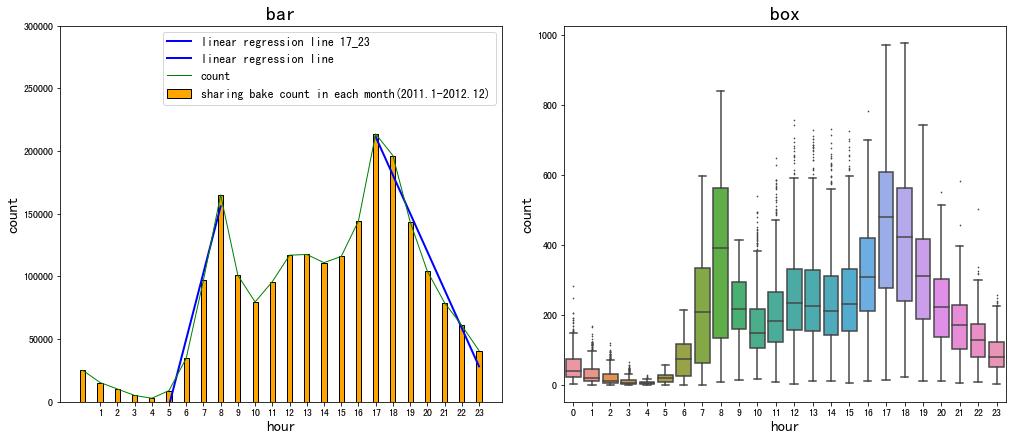

In [30]:
cols = 2
rows = 1
figsize = (14, 6)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].bar(hour_number,height = hour_count,width = 0.3,color = 'orange', label = 'sharing bake count in each month(2011.1-2012.12)',edgecolor = 'black')
axs[0].plot(hour_number[17:24], linear_regression_hour_17_24,c = 'blue',label = 'linear regression line 17_23', linewidth = 2)
axs[0].plot(hour_number[5:9], linear_regression_hour_5_9,c = 'blue',label = 'linear regression line', linewidth = 2)
axs[0].plot(hour_number,hour_count,c = 'green',label = 'count',linewidth = 1)
axs[0].legend(loc = 1,fontsize =12)
axs[0].set_ylim(0,300000)
axs[0].set_xlabel('hour',fontsize = 15)
axs[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
axs[0].set_ylabel('count',fontsize = 15)
sns.boxplot(x='hour', y='count', data=df,fliersize = 0.8)
axs[0].legend(loc = 1,fontsize =12)
axs[1].set_xlabel('hour',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[0].set_title('bar',fontsize = 20)
axs[1].set_title('box',fontsize = 20)

#### Analysis

we can see from above, the demand of sharing bake change a lot from hours(24 hours). 

There are plenty of changes within 24 hours. the demand is extremely low from 23:00 to 6:00, I think it's because of midnight. 

from 5:00 to 8:00, the demand rise very fast linearly, I think it's because people go to work at this time. 

and from 17:00 to 23:00, the demand decrease linearly, beacause people go home from 17:00 to 19:00, and after 20:00, most are at home, only a few people need bake, so the count is very low.

### 2011 - 2012 Shared bike borrowing statistics

In [31]:
group_by_date = df.groupby('date').mean()
group_by_month = df.groupby('year_month').mean()

In [32]:
group_by_date

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month
date,,,,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667,11.500000,5.0,1.0
2011-01-02,1.0,0.0,0.0,1.956522,14.902609,17.686957,69.608696,16.652122,5.695652,29.130435,34.826087,11.782609,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18,4.0,0.0,1.0,1.208333,16.844167,20.485417,66.625000,14.834079,18.041667,213.500000,231.541667,11.500000,1.0,12.0
2012-12-19,4.0,0.0,1.0,1.000000,13.632500,17.108125,62.541667,12.334142,13.875000,205.583333,219.458333,11.500000,2.0,12.0


In [33]:
# we plot the month data at 15th every month
import datetime
tmp = []
for i in range(12):
    tmp.append(datetime.date(2011,i+1,15))   
for i in range(12):
    tmp.append(datetime.date(2012,i+1,15))
month_year = np.array(tmp)

#### plot the bike borrowing count from 2011.1 to 2012.12

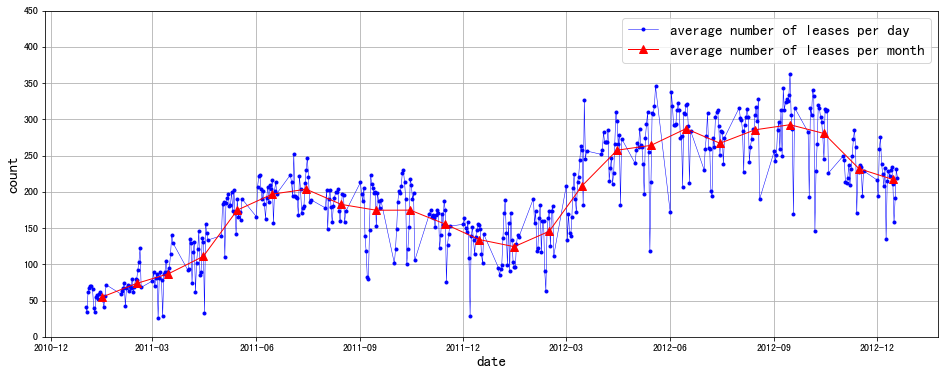

In [36]:
plt.figure(figsize=(16,6))
plt.plot(np.array(group_by_date.index), group_by_date['count'], label = 'average number of leases per day',linestyle='-', marker = 'o', linewidth = 0.5, markersize = 3, color = 'blue')
plt.plot(month_year, group_by_month['count'], label = 'average number of leases per month',linestyle='-', marker = '^', linewidth = 1, markersize = 8, color = 'red')
plt.legend(loc =1 , fontsize =15)
plt.ylim(0,450)
plt.xlabel('date',fontsize =15)
plt.ylabel('count',fontsize =15)
plt.grid()

#### Analysis
change in demand dissipates roughly the same in 2011 and in 2012, but the total count of 2012 is larger than 2011, which means more and more people start to use shraing bake, sharing bake become increasingly popular.

and we can also see the demand change dramaticly within a month, and that is analysed above.

### Weeks with Caual(unregistered) Users and Registered Users

Text(0,0.5,'whole')

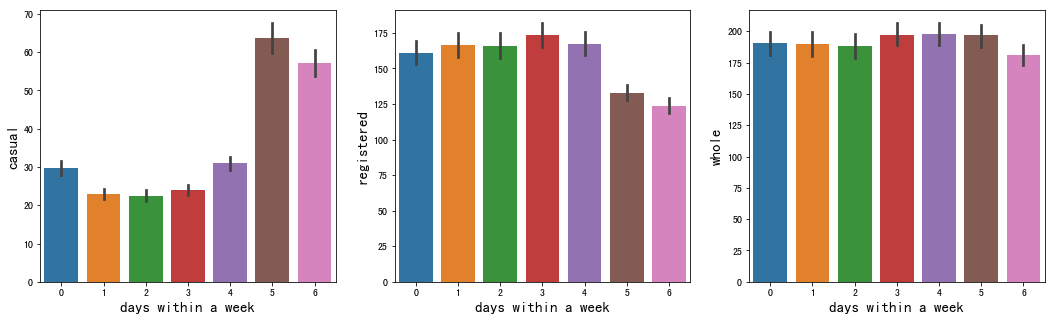

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x="week",y='casual' ,data=df,ax=axes[0])
sns.barplot(x='week',y='registered', data=df, ax=axes[1])
sns.barplot(x='week',y='count', data=df, ax=axes[2])
axes[0].set_xlabel('days within a week',fontsize = 15)
axes[1].set_xlabel('days within a week',fontsize = 15)
axes[2].set_xlabel('days within a week',fontsize = 15)
axes[0].set_ylabel('casual',fontsize = 15)
axes[1].set_ylabel('registered',fontsize = 15)
axes[2].set_ylabel('whole',fontsize = 15)

#### Analysis
we can see from the third chart above, the demand change a liitle for whole users in each days within a week which we analyse before.

for casual (unregistered) users, they borrow more in Friday and Saturday than in other days.

for registered users, the demand changes very little within a week.

### Holiday or Workingday with Caual(unregistered) Users and Registered Users

0 - working day

1 - holiday

Text(0.5,1,'total users')

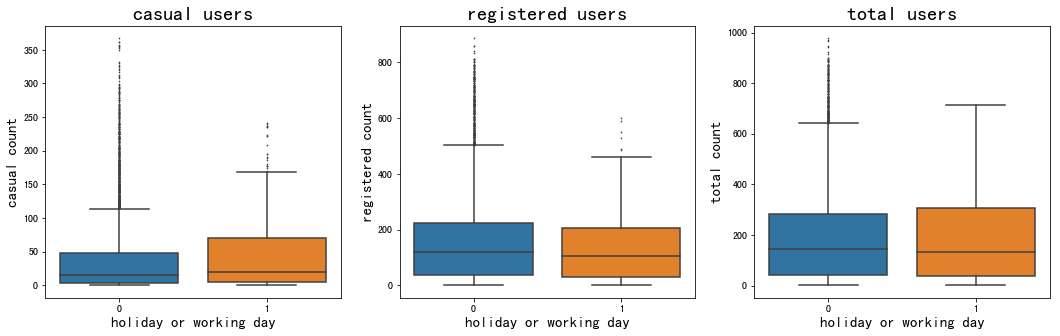

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.boxplot(x='holiday', y='casual', data=df, ax=axes[0],fliersize = 0.8)
sns.boxplot(x='holiday', y='registered', data=df, ax=axes[1],fliersize = 0.8)
sns.boxplot(x='holiday', y='count', data=df, ax=axes[2],fliersize = 0.8)
axes[0].set_xlabel('holiday or working day', fontsize = 15)
axes[1].set_xlabel('holiday or working day', fontsize = 15)
axes[2].set_xlabel('holiday or working day', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual users', fontsize = 20)
axes[1].set_title('registered users', fontsize = 20)
axes[2].set_title('total users', fontsize = 20)

#### Analysis
we can see from the third chart above, the demand change a liitle for whether it's holiday or working day.

for casual (unregistered) users, they borrow more in holiday than in working day, I think because they borrow sharing bake more for go out to play.

for registered users, they borrow more in working day thab in holiday, I think because they borrow sharing bake more for going to work, and that's also why they are registered.

### Hours with Caual(unregistered) Users and Registered Users

In [39]:
hour_casual_holiday = df[df.holiday==1].groupby('hour')['casual'].mean()
hour_registered_holiday = df[df.holiday==1].groupby('hour')['registered'].mean()
hour_count_holiday = df[df.holiday==1].groupby('hour')['count'].mean()

In [40]:
hour_casual_workingday = df[df.workingday==1].groupby('hour')['casual'].mean()
hour_registered_workingday = df[df.workingday==1].groupby('hour')['registered'].mean()
hour_count_workingday = df[df.workingday==1].groupby('hour')['count'].mean()

In [41]:
hour_casual = df.groupby('hour')['casual'].mean()
hour_registered = df.groupby('hour')['registered'].mean()
hour_count = df.groupby('hour')['count'].mean()

Text(0,0.5,'count')

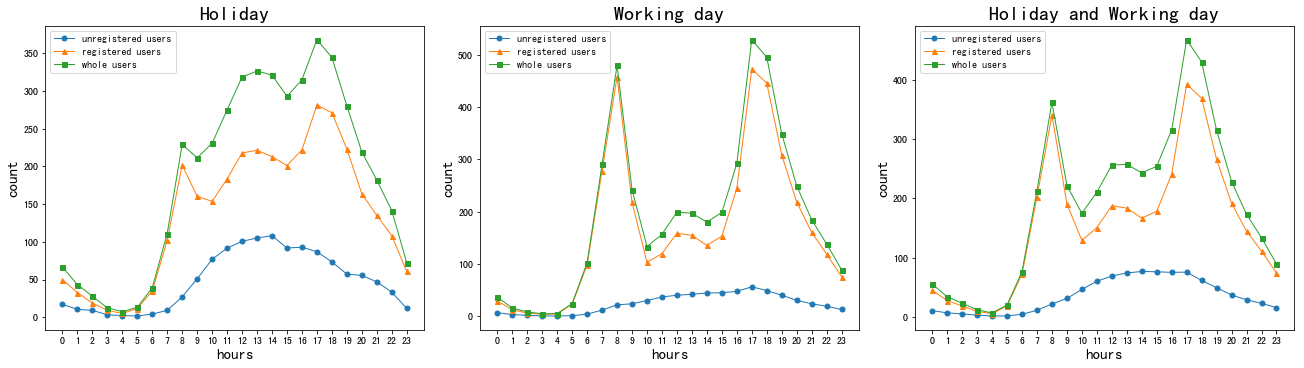

In [42]:
cols = 3
rows = 1
figsize = (18, 5)
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs[0].plot(np.array(hour_casual_holiday.index), hour_casual_holiday.values,label = 'unregistered users', marker = 'o', linewidth = 1, markersize = 5)
axs[0].plot(np.array(hour_registered_holiday.index), hour_registered_holiday.values, label = 'registered users', marker = '^', linewidth = 1, markersize = 5)
axs[0].plot(np.array(hour_count_holiday.index), hour_count_holiday.values, label = 'whole users', marker = 's', linewidth = 1, markersize = 5)
axs[0].legend(fontsize = 10)

axs[1].plot(np.array(hour_casual_workingday.index), hour_casual_workingday.values,label = 'unregistered users', marker = 'o', linewidth = 1, markersize = 5)
axs[1].plot(np.array(hour_registered_workingday.index), hour_registered_workingday.values, label = 'registered users', marker = '^', linewidth = 1, markersize = 5)
axs[1].plot(np.array(hour_count_workingday.index), hour_count_workingday.values, label = 'whole users', marker = 's', linewidth = 1, markersize = 5)
axs[1].legend(fontsize = 10)

axs[2].plot(np.array(hour_casual.index), hour_casual.values,label = 'unregistered users', marker = 'o', linewidth = 1, markersize = 5)
axs[2].plot(np.array(hour_registered.index), hour_registered.values, label = 'registered users', marker = '^', linewidth = 1, markersize = 5)
axs[2].plot(np.array(hour_count.index), hour_count.values, label = 'whole users', marker = 's', linewidth = 1, markersize = 5)
axs[2].legend(fontsize = 10)

axs[0].set_xticks(np.linspace(0,23,24).astype(int))
axs[1].set_xticks(np.linspace(0,23,24).astype(int))
axs[2].set_xticks(np.linspace(0,23,24).astype(int))

axs[0].set_title('Holiday', fontsize = 20)
axs[1].set_title('Working day', fontsize = 20)
axs[2].set_title('Holiday and Working day', fontsize = 20)

axs[0].set_xlabel('hours',fontsize = 15)
axs[1].set_xlabel('hours',fontsize = 15)
axs[2].set_xlabel('hours',fontsize = 15)

axs[0].set_ylabel('count',fontsize = 15)
axs[1].set_ylabel('count',fontsize = 15)
axs[2].set_ylabel('count',fontsize = 15)

#### Analysis
we can see that registered users is more than casual users.

for registered users, the trend of demand in workingday is similar to our previous analysis before. Because they borrow bake mainly for going to wrok place. and in holiday, the trend is also very similar to the working, maybe they work overtime in Weekend (but I think it's illegal in the United States ! haha !) 

for casual (unregistered) users, they seldom borrow bake in working and in holiday, the trend of demand is similar to registered users, so I can claim that they borrow bake mainly for having fun.



### Weather with Caual(unregistered) Users and Registered Users

**weather**

1 - Clear, Few clouds, Partly cloudy, Partly cloudy 

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 

4 -  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**working day or not**

0 - holiday

1 - working day

Text(0.5,1,'total users')

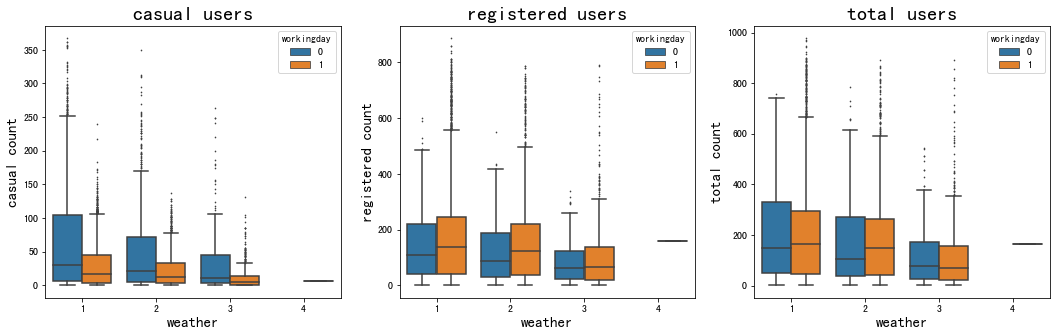

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='weather', y='casual', hue='workingday',data=df, ax=axes[0], fliersize = 0.8)
sns.boxplot(x='weather', y='registered',hue='workingday', data=df, ax=axes[1], fliersize = 0.8)
sns.boxplot(x='weather', y='count',hue='workingday', data=df, ax=axes[2], fliersize = 0.8)
axes[0].set_xlabel('weather', fontsize = 15)
axes[1].set_xlabel('weather', fontsize = 15)
axes[2].set_xlabel('weather', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual users', fontsize = 20)
axes[1].set_title('registered users', fontsize = 20)
axes[2].set_title('total users', fontsize = 20)

#### Analysis

The number of leases on working and non-working days decreases with the bad weather

and for casual users, on holiday, if the weather is bad, they seldom borrow the bake.

on rainy and snowy days, there is no bicycle lease on non-working days.

As can be seen from the chart, there is only one data on heavy rain and snow days. Let's look at the original data.

In [44]:
df[df.weather==4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year_month,date
5631,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,18,0,1,2012-01,2012-01-09


Only when it rains heavily and snows at 18:00 on Jan. 9, 2012, can the weather change suddenly. Some users may rent bicycles because they don't watch the weather forecast, but there are other reasons.

### Temperature with Caual(unregistered) Users and Registered Users

In [45]:
group_by_temp = df.groupby('temp').mean()
np_data_temp = np.array(group_by_temp)
group_by_temp

,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,hour,week,month
temp,,,,,,,,,,,,,
0.82,1.0,0.0,1.0,1.000000,1.9500,39.857143,13.856557,0.857143,76.857143,77.714286,5.000000,2.000000,1.0
1.64,1.0,0.0,1.0,1.000000,2.2725,41.500000,14.498800,3.500000,88.000000,91.500000,5.000000,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39.36,3.0,0.0,0.0,1.333333,43.3075,30.000000,11.665817,106.333333,211.500000,317.833333,14.166667,5.166667,7.0
41.00,3.0,0.0,0.0,1.000000,43.1800,19.000000,11.001400,102.000000,192.000000,294.000000,16.000000,5.000000,7.0


Text(0.5,1,'total users')

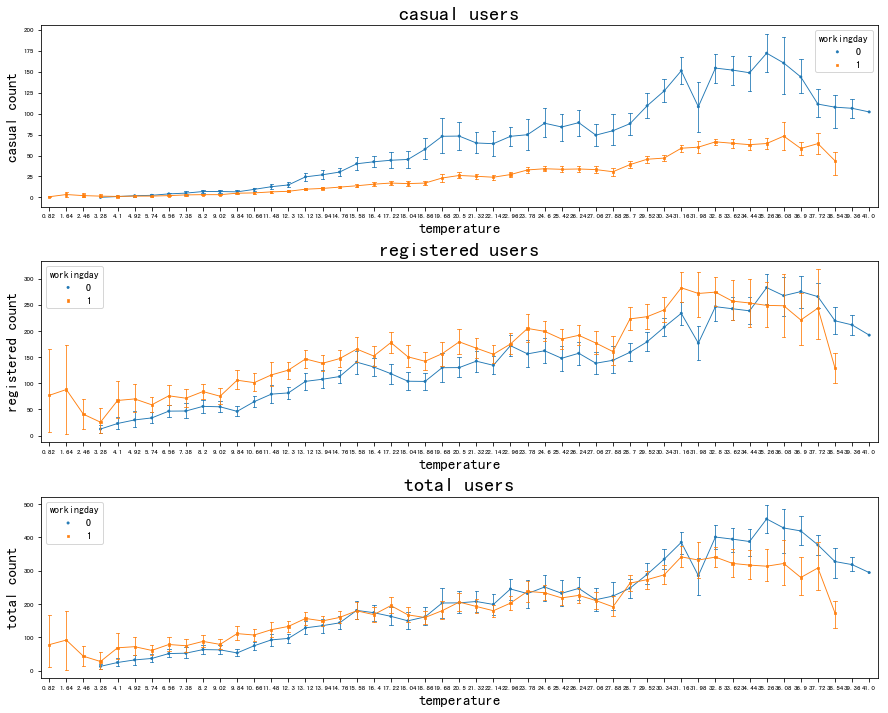

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(wspace =0, hspace =0.3)
sns.set_context(rc={"lines.linewidth":0.5})
sns.pointplot(x='temp', y='casual', hue='workingday',data=df, ax=axes[0], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='temp', y='registered', hue='workingday',data=df, ax=axes[1], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='temp', y='count', hue='workingday',data=df, ax=axes[2], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
axes[0].tick_params(labelsize = 7)
axes[1].tick_params(labelsize = 7)
axes[2].tick_params(labelsize = 7)
axes[0].set_xlabel('temperature', fontsize = 15)
axes[1].set_xlabel('temperature', fontsize = 15)
axes[2].set_xlabel('temperature', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual users', fontsize = 20)
axes[1].set_title('registered users', fontsize = 20)
axes[2].set_title('total users', fontsize = 20)

#### Analysis

### "feels like" Temperature with Caual(unregistered) Users and Registered Users

In [47]:
group_by_atemp = df.groupby('atemp').mean()
np_data_atemp = np.array(group_by_atemp)
group_by_atemp

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,week,month
atemp,,,,,,,,,,,,,
0.760,1.0,0.0,1.0,1.000000,0.82,34.0,19.0012,0.000000,1.000000,1.000000,2.500000,2.0,1.0
1.515,1.0,0.0,1.0,1.000000,1.64,38.0,19.9995,0.000000,3.000000,3.000000,1.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44.695,3.0,0.0,0.0,1.666667,37.72,42.0,17.3329,101.666667,252.666667,354.333333,12.666667,6.0,7.0
45.455,3.0,0.0,0.0,1.000000,39.36,36.0,11.0014,77.000000,235.000000,312.000000,14.000000,6.0,7.0


Text(0.5,1,'total users')

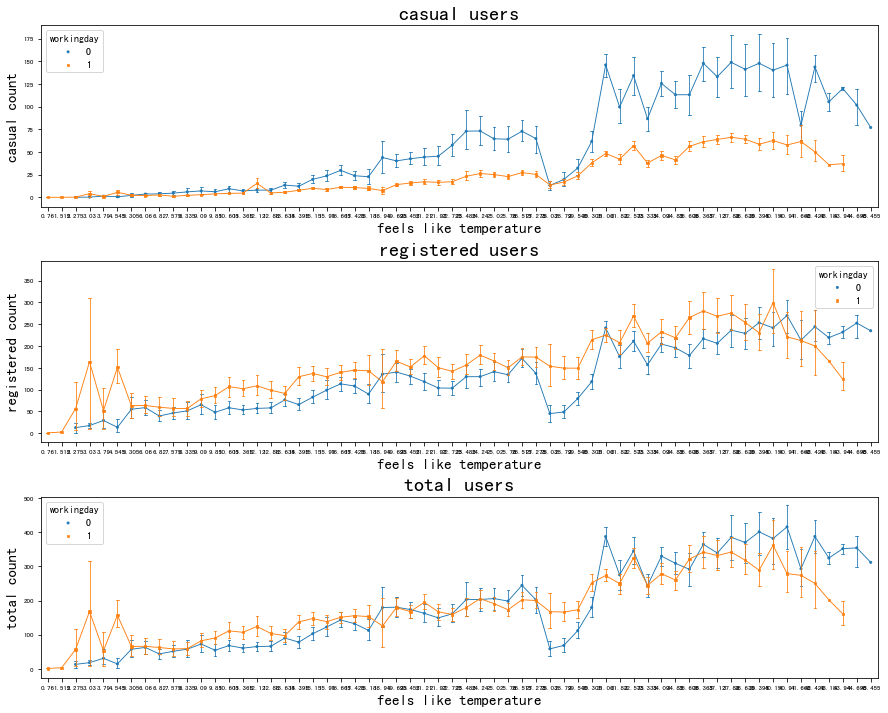

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(wspace =0, hspace =0.3)
sns.set_context(rc={"lines.linewidth":0.5})
sns.pointplot(x='atemp', y='casual', hue='workingday',data=df, ax=axes[0], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='atemp', y='registered', hue='workingday',data=df, ax=axes[1], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='atemp', y='count', hue='workingday',data=df, ax=axes[2], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
axes[0].tick_params(labelsize = 7)
axes[1].tick_params(labelsize = 7)
axes[2].tick_params(labelsize = 7)
axes[0].set_xlabel('feels like temperature', fontsize = 15)
axes[1].set_xlabel('feels like temperature', fontsize = 15)
axes[2].set_xlabel('feels like temperature', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual users', fontsize = 20)
axes[1].set_title('registered users', fontsize = 20)
axes[2].set_title('total users', fontsize = 20)

#### Analysis

### Humidity with Caual(unregistered) Users and Registered Users

In [49]:
group_by_humidity = df.groupby('humidity').mean()
np_data_humidity = np.array(group_by_humidity)
group_by_humidity

,season,holiday,workingday,weather,temp,atemp,windspeed,casual,registered,count,hour,week,month
humidity,,,,,,,,,,,,,
0,1.000000,0.0,1.000000,2.909091,15.952727,19.283409,17.545777,2.090909,26.227273,28.318182,12.227273,3.000000,3.000000
8,1.000000,0.0,1.000000,1.000000,21.320000,25.000000,19.001200,16.000000,61.000000,77.000000,23.000000,4.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.000000,0.0,0.000000,2.000000,24.600000,25.000000,7.001500,18.000000,46.000000,64.000000,2.000000,5.000000,9.000000
100,2.608108,0.0,0.614865,2.486486,17.070405,20.229189,11.135445,5.918919,60.574324,66.493243,9.405405,3.344595,7.189189


Text(0.5,1,'total users')

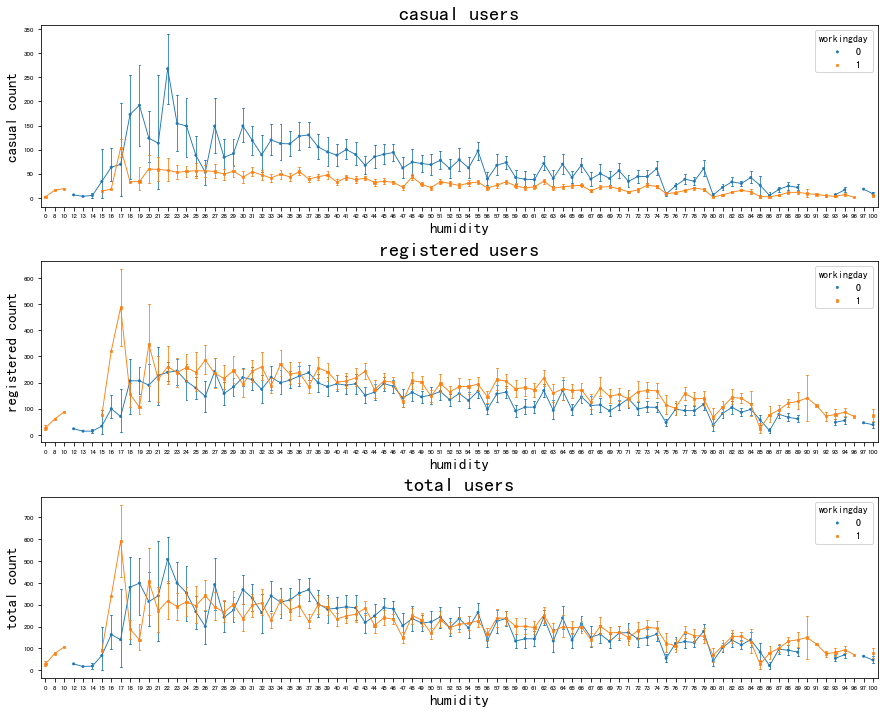

In [51]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(wspace =0, hspace =0.3)
sns.set_context(rc={"lines.linewidth":0.5})
sns.pointplot(x='humidity', y='casual', hue='workingday',data=df, ax=axes[0], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='humidity', y='registered', hue='workingday',data=df, ax=axes[1], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='humidity', y='count', hue='workingday',data=df, ax=axes[2], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
axes[0].tick_params(labelsize = 7)
axes[1].tick_params(labelsize = 7)
axes[2].tick_params(labelsize = 7)
axes[0].set_xlabel('humidity', fontsize = 15)
axes[1].set_xlabel('humidity', fontsize = 15)
axes[2].set_xlabel('humidity', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual users', fontsize = 20)
axes[1].set_title('registered users', fontsize = 20)
axes[2].set_title('total users', fontsize = 20)

#### Analysis

### Windspeed with Caual(unregistered) Users and Registered Users

In [52]:
group_by_windspeed = df.groupby('windspeed').mean()
np_data_windspeed = np.array(group_by_windspeed)
group_by_windspeed

,season,holiday,workingday,weather,temp,atemp,humidity,casual,registered,count,hour,week,month
windspeed,,,,,,,,,,,,,
0.0000,2.724296,0.031226,0.686976,1.370145,19.801158,23.828111,68.134806,29.805788,131.295506,161.101295,9.898705,3.025133,7.191165
6.0032,2.611239,0.026376,0.666284,1.432339,19.637683,23.385103,69.700688,28.262615,119.602064,147.864679,10.136468,3.027523,6.889908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51.9987,1.000000,0.000000,1.000000,1.000000,12.300000,12.120000,42.000000,0.000000,5.000000,5.000000,1.000000,1.000000,2.000000
56.9969,3.000000,0.000000,0.000000,3.000000,32.800000,37.120000,49.000000,127.500000,142.000000,269.500000,17.500000,6.000000,7.000000


Text(0.5,1,'total users')

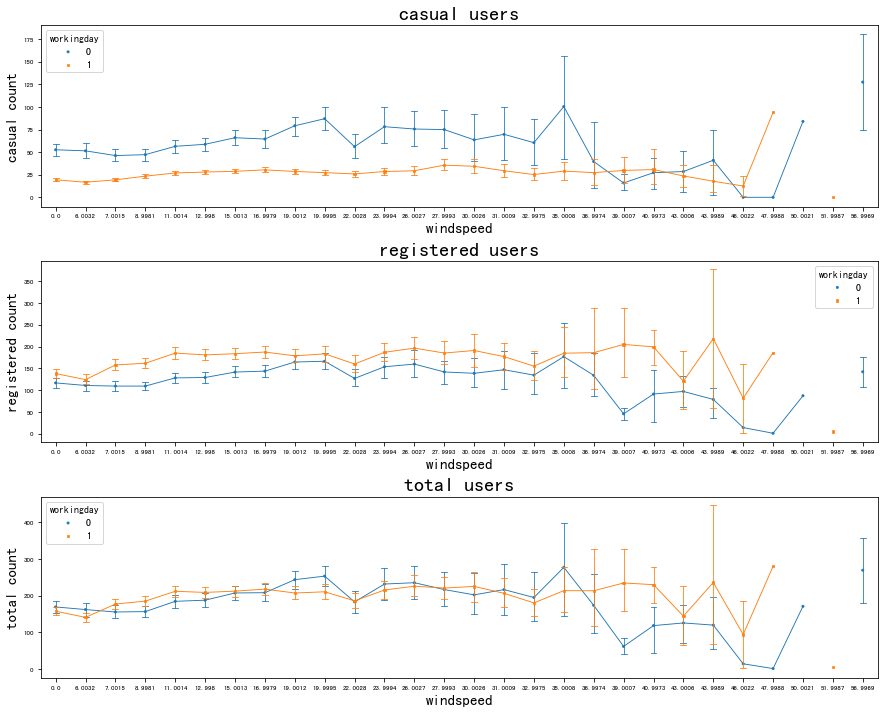

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(wspace =0, hspace =0.3)
sns.set_context(rc={"lines.linewidth":0.5})
sns.pointplot(x='windspeed', y='casual', hue='workingday',data=df, ax=axes[0], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='windspeed', y='registered', hue='workingday',data=df, ax=axes[1], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
sns.pointplot(x='windspeed', y='count', hue='workingday',data=df, ax=axes[2], markers= ['o','s'], errwidth = 0.8, capsize =0.2)
axes[0].tick_params(labelsize = 7)
axes[1].tick_params(labelsize = 7)
axes[2].tick_params(labelsize = 7)
axes[0].set_xlabel('windspeed', fontsize = 15)
axes[1].set_xlabel('windspeed', fontsize = 15)
axes[2].set_xlabel('windspeed', fontsize = 15)
axes[0].set_ylabel('casual count', fontsize = 15)
axes[1].set_ylabel('registered count', fontsize = 15)
axes[2].set_ylabel('total count', fontsize = 15)
axes[0].set_title('casual users', fontsize = 20)
axes[1].set_title('registered users', fontsize = 20)
axes[2].set_title('total users', fontsize = 20)

#### Analysis

Wind speed is 0, which is obviously unreasonable, treat it as a missing value.

In [55]:
df.loc[df.windspeed == 0, 'windspeed'] = np.nan
df.fillna(method='bfill', inplace=True)
#df.windspeed.isnull().sum()

#### logarithmical transformation

Because some variables do not satisfy normal distribution, they are transformed logarithmically.

In [56]:
#transformed logarithmically.
df['windspeed'] = np.log(df['windspeed'].apply(lambda x: x+1))
df['casual'] = np.log(df['casual'].apply(lambda x: x+1))
df['registered'] = np.log(df['registered'].apply(lambda x: x+1))
df['count'] = np.log(df['count'].apply(lambda x: x+1))

### Relevance degree between different factors

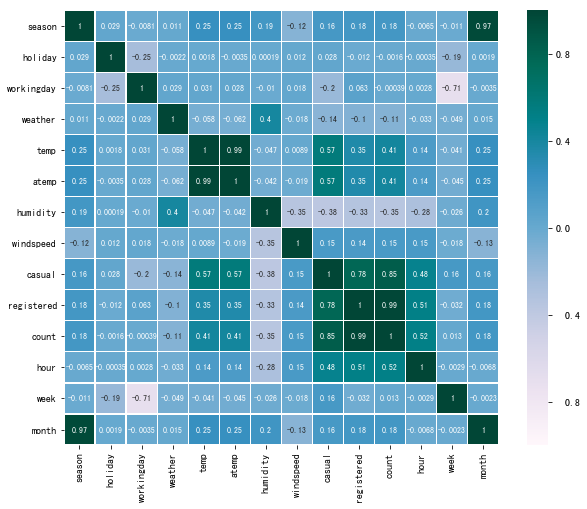

In [57]:
correlation = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
#plot heatmap
sns.heatmap(correlation, linewidths=0.2, vmax=1, vmin=-1, linecolor='w',
            annot=True,annot_kws={'size':8},square=True,cmap=plt.get_cmap('PuBuGn'))

#### Analysis

## Predict the demand in the future

in this section, I will apply some different machine learning and deep learning algorithm.

### split training set and test set

In [78]:
ls

README.md                  test.csv*
bike-sharing-demand.ipynb  train.csv*
sampleSubmission.csv*


In [69]:
df_train = pd.read_csv('train.csv')
df_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
...,...,...,...,...,...,...,...,...,...,...,...,...
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


we split the training set train.csv.

In [111]:
df = pd.read_csv('train.csv')
from sklearn.model_selection import train_test_split

#Since the number of leases for all users is the sum of unregistered users and registered users, it is deleted.
df.drop(['casual','registered', 'datetime'], axis=1, inplace=True)
X = df.drop(['count'], axis=1)
y = df['count']

#Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [112]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
3224,3,0,1,2,27.88,31.820,89,19.9995
1299,1,0,0,2,24.60,31.060,53,16.9979
...,...,...,...,...,...,...,...,...
5192,4,0,0,1,13.12,15.150,57,16.9979
235,1,0,1,2,6.56,7.575,55,12.9980


### Linear Regression

In [114]:
from sklearn.linear_model import LinearRegression

#training linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.coef_)
print(LR.intercept_)

#predict training set and test set respectively, and calculate root mean square error and goodness of fit.
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
y_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
y_train_score = LR.score(X_train, y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_pred))
y_test_score = LR.score(X_test, y_test)
print('train set RMSE: {0}, score: {1}'.format(y_train_rmse, y_train_score))
print('test set RMSE: {0}, score: {1}'.format(y_test_rmse, y_test_score))

[ 22.91490723 -17.55632285  -3.05040861   6.50525886   1.95767243
   5.49979519  -3.12407319   0.78131839]
139.83542725808485
train set RMSE: 154.73741531418415, score: 0.26273298717528526
test set RMSE: 159.6847398817533, score: 0.2522253329349279


### Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

#predict training set and test set respectively, and calculate root mean square error and goodness of fit.

rd = Ridge(alpha=1)
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[ 22.91204517 -17.47569933  -3.04170676   6.50284075   1.95763992
   5.49991616  -3.12400999   0.7812748 ]
139.832324838753


/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


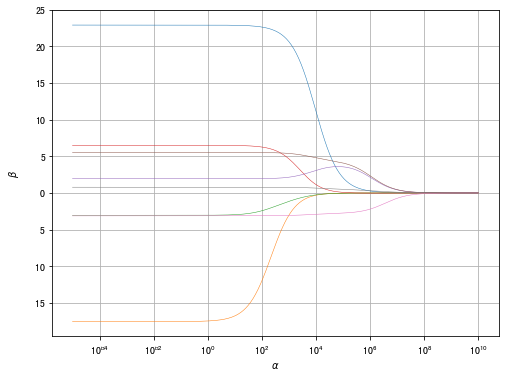

In [96]:
#setting parameters and training model
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    rd = Ridge(alpha = alpha)
    rd.fit(X_train, y_train)
    betas.append(rd.coef_)
    
#plot
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
#logarithmic conversion
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
#plt.title(r'regularization term parameters $\alpha$ regression coefficient $\beta$ ridge trace')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [98]:
rd = Ridge(alpha=805.0291812295973) #, fit_intercept=False
rd.fit(X_train, y_train)
print(rd.coef_)
print(rd.intercept_)

[21.03925983 -3.63012706 -1.26981307  4.93151008  2.10803326  5.41893252
 -3.08062954  0.76639938]
141.55408922080883


In [99]:
from sklearn import metrics
from math import sqrt
#分别预测训练数据和测试数据
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)
#分别计算其均方根误差和拟合优度
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_pred))
y_train_score = rd.score(X_train, y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_pred))
y_test_score = rd.score(X_test, y_test)
print('train set RMSE: {0}, score: {1}'.format(y_train_rmse, y_train_score))
print('test set RMSE: {0}, score: {1}'.format(y_test_rmse, y_test_score))

train set RMSE: 154.76737563990343, score: 0.2624474596159796
test set RMSE: 159.60048476063605, score: 0.2530142276495845


### Lasso Regression

/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda3/lib/python3.6/site-packages/matplotlib/mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


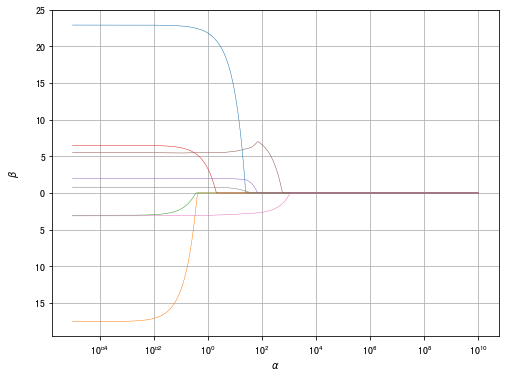

In [100]:
from sklearn.linear_model import Lasso
alphas = 10**np.linspace(-5, 10, 500)
betas = []
for alpha in alphas:
    Las = Lasso(alpha = alpha)
    Las.fit(X_train, y_train)
    betas.append(Las.coef_)
plt.figure(figsize=(8,6))
plt.plot(alphas, betas)
plt.xscale('log')
plt.grid(True)
plt.axis('tight')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [101]:
from sklearn.linear_model import LassoCV
from sklearn import metrics
Las_cv = LassoCV(alphas=alphas, cv=10)
Las_cv.fit(X_train, y_train)
Las_cv.alpha_

0.018903973778192213

In [102]:
Las = Lasso(alpha=0.005074705239490466) #, fit_intercept=False
Las.fit(X_train, y_train)
print(Las.coef_)
print(Las.intercept_)

[ 22.90864195 -17.3399205   -3.00780018   6.48862994   1.96226221
   5.49573531  -3.12374221   0.78107271]
139.82566236748136


In [103]:
y_train_pred = Las.predict(X_train)
y_test_pred = Las.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_pred))
y_train_score = Las.score(X_train, y_train)
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_pred))
y_test_score = Las.score(X_test, y_test)
print('train set RMSE: {0}, score: {1}'.format(y_train_rmse, y_train_score))
print('test set RMSE: {0}, score: {1}'.format(y_test_rmse, y_test_score))

train set RMSE: 154.73742008447667, score: 0.2627329417178971
test set RMSE: 159.68297927609973, score: 0.2522418220377648
